In [ ]:
# Characterisation can be done by changing settings to qibolab/runcards/tii1q.yml and examples/tii/diagnostics.yml
# These scripts do not save the characterisation results to the runcard

In [1]:
from qibolab.paths import script_folder, qibolab_folder
from qibolab import Platform
from qibolab.calibration import utils
from qibolab.calibration.calibration import Calibration as Diagnostics

diagnostics_settings = script_folder / "diagnostics.yml"
runcard = qibolab_folder / 'runcards' / 'tii1q.yml' 

# Create a platform; connect and configure it
platform = Platform('multiqubit', runcard)
platform.connect()
platform.setup()

# create a diagnostics/calibration object
ds = Diagnostics(platform, diagnostics_settings)

# select the qubit to be characterised
qubit = 0

[Qibo 0.1.8.dev2|INFO|2022-08-03 08:44:03]: Loading platform multiqubit from runcard d:\alvaro\projects\github\qibolab\src\qibolab\runcards\tii1q.yml
[Qibo 0.1.8.dev2|INFO|2022-08-03 08:44:04]: Connecting to multiqubit instrument qrm_rf.
[Qibo 0.1.8.dev2|INFO|2022-08-03 08:44:06]: Connecting to multiqubit instrument qcm_rf.
[Qibo 0.1.8.dev2|INFO|2022-08-03 08:44:10]: Creating MeasurementControl Calibration


In [ ]:
ds.backup_config_file()

Resonator Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     31s | time left:      0s  
100% completed | elapsed time:     31s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:     23s | time left:      0s  
100% completed | elapsed time:     23s | time left:      0s  

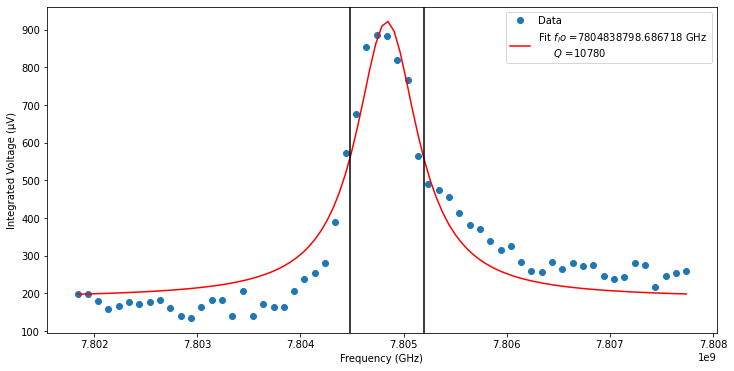


Resonator Frequency = 7824838798


In [6]:
resonator_freq, avg_voltage, peak_voltage, dataset = ds.run_resonator_spectroscopy(qubit)

In [7]:
print(f"Average voltage: {int(avg_voltage)}")
print(f"Peak voltage: {int(peak_voltage)}")
print(f"Resonator frequency: {resonator_freq}")
print(f"LO frequency: {resonator_freq - platform.settings['native_gates']['single_qubit'][qubit]['MZ']['frequency']}")

Average voltage: 250
Peak voltage: 922
Resonator frequency: 7824838798
qrm_rf out0_in0_lo_freq: 7804838798


In [ ]:
ds.save_config_parameter("resonator_freq", resonator_freq, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("resonator_spectroscopy_avg_ro_voltage", int(avg_voltage), 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("resonator_spectroscopy_peak_ro_voltage", int(peak_voltage), 'characterization', 'single_qubit', qubit)
lo_qrm_frequency = int(resonator_freq - platform.settings['native_gates']['single_qubit'][qubit]['MZ']['frequency'])
ds.save_config_parameter("out0_in0_lo_freq", lo_qrm_frequency, 'instruments', platform.qrm[qubit].name, 'settings')

Resonator Punchout

In [ ]:
dataset = ds.run_resonator_punchout(qubit)

Resonator Spectroscopy Flux

In [ ]:
dataset = ds.run_resonator_punchout(qubit, fluxline = 0)

Qubit Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     22s | time left:      0s  
100% completed | elapsed time:     22s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:     20s | time left:      0s  
100% completed | elapsed time:     20s | time left:      0s  

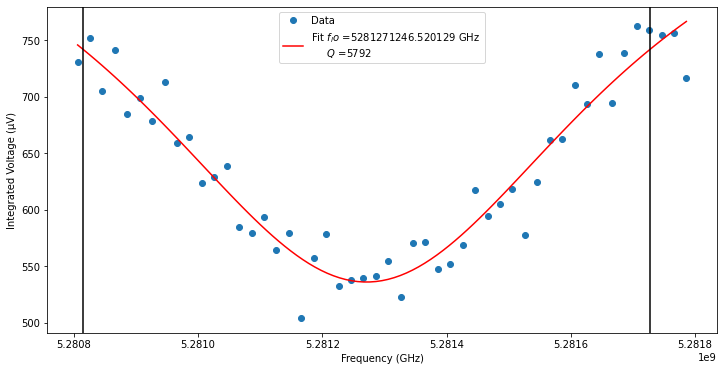


Qubit Frequency = 5081271246


In [8]:
qubit_freq, avg_voltage, peak_voltage, dataset = ds.run_qubit_spectroscopy(qubit)

In [9]:
print(f"Average voltage: {int(avg_voltage)}")
print(f"Peak voltage: {int(peak_voltage)}")
print(f"Qubit frequency: {qubit_freq}")
print(f"LO frequency: {qubit_freq - platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency']}")

Average voltage: 782
Peak voltage: 0
Qubit frequency: 5081271246
qcm_rf1 out0_in0_lo_freq: 5281271246


In [ ]:
ds.save_config_parameter("qubit_freq", qubit_freq, 'characterization', 'single_qubit', qubit)
lo_qcm_frequency = int(qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
ds.save_config_parameter("qubit_spectroscopy_peak_ro_voltage", float(peak_voltage), 'characterization', 'single_qubit', qubit)

Rabi Oscillations with varying pulse length

Starting iterative measurement...
100% completed | elapsed time:     95s | time left:      0s  
100% completed | elapsed time:     95s | time left:      0s  
Pi pulse duration = 35.258128449079685

Pi pulse amplitude = 0.94

rabi oscillation peak voltage = 350


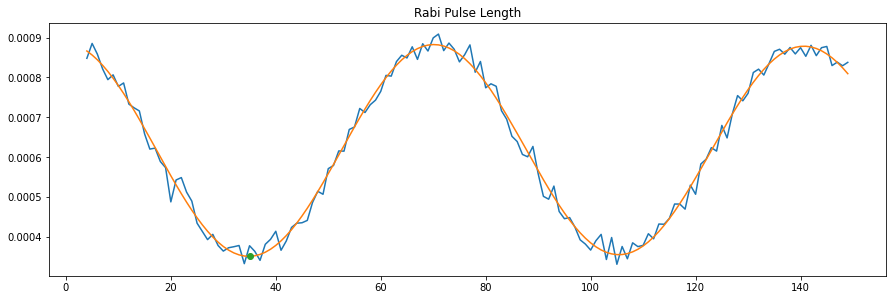

In [10]:
pi_pulse_duration, pi_pulse_amplitude, rabi_oscillations_pi_pulse_peak_ro_voltage, dataset = ds.run_rabi_pulse_length(qubit)

In [11]:
print(f"Pi pulse duration: {pi_pulse_duration}")
print(f"Pi pulse amplitude: {pi_pulse_amplitude}")
print(f"Rabi Oscillation pi pulse peak voltage: {rabi_oscillations_pi_pulse_peak_ro_voltage}")

Pi pulse duration: 35.258128449079685
Pi pulse amplitude: 0.94
Rabi Oscillation pi pulse peak voltage: 350


In [ ]:
ds.save_config_parameter("duration", int(pi_pulse_duration), 'native_gates', 'single_qubit', qubit, 'RX')
ds.save_config_parameter("amplitude", float(pi_pulse_amplitude), 'native_gates', 'single_qubit', qubit, 'RX')
ds.save_config_parameter("rabi_oscillations_pi_pulse_peak_ro_voltage", float(rabi_oscillations_pi_pulse_peak_ro_voltage), 'characterization', 'single_qubit', qubit)

Rabi Oscillations with varying pulse gain

In [ ]:
pi_pulse_gain, pi_pulse_amplitude, rabi_oscillations_pi_pulse_peak_voltage, dataset = ds.run_rabi_pulse_gain(qubit)

In [13]:
dataset['x0'].values[dataset['y0'].argmin().values]

0.2850000000000001

In [13]:
print(f"Pi pulse gain: {pi_pulse_gain}")
print(f"Pi pulse amplitude: {pi_pulse_amplitude}")
print(f"Rabi Oscillation pi pulse peak voltage: {rabi_oscillations_pi_pulse_peak_ro_voltage}")

Pi pulse gain: 0.23819567784402343
Pi pulse amplitude: 0.9
Rabi Oscillation pi pulse peak voltage: 497


Rabi Oscillations with varying amplitude

Starting iterative measurement...
100% completed | elapsed time:     47s | time left:      0s  
100% completed | elapsed time:     47s | time left:      0s  
Pi pulse gain = 0.4

Pi pulse amplitude = 0.9420139883482554

Pi pulse duration = 36

rabi oscillation peak voltage = 362


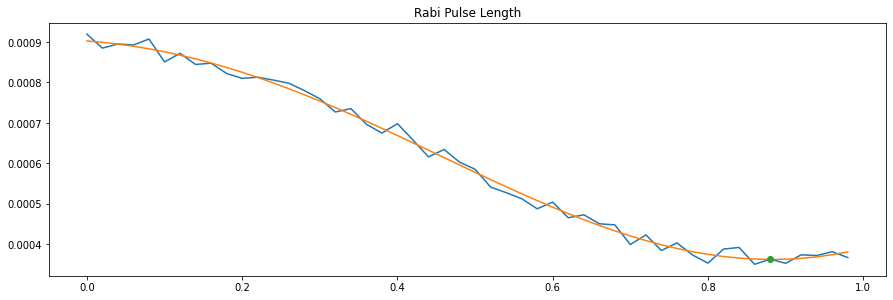

In [2]:
pi_pulse_gain, pi_pulse_amplitude, rabi_oscillations_pi_pulse_peak_voltage, dataset = ds.run_rabi_pulse_amplitude(qubit)

In [ ]:
print(f"Pi pulse gain: {pi_pulse_gain}")
print(f"Pi pulse amplitude: {pi_pulse_amplitude}")
print(f"Rabi Oscillation pi pulse peak voltage: {rabi_oscillations_pi_pulse_peak_ro_voltage}")

Rabi Oscillations with varying length and gain

In [ ]:
dataset = ds.run_rabi_pulse_length_and_gain(qubit)

Rabi Oscillations with varying length and amplitude

In [ ]:
dataset = ds.run_rabi_pulse_length_and_amplitude(qubit)

T1

Starting iterative measurement...
100% completed | elapsed time:     56s | time left:      0s  
100% completed | elapsed time:     56s | time left:      0s  
T1 = 17744


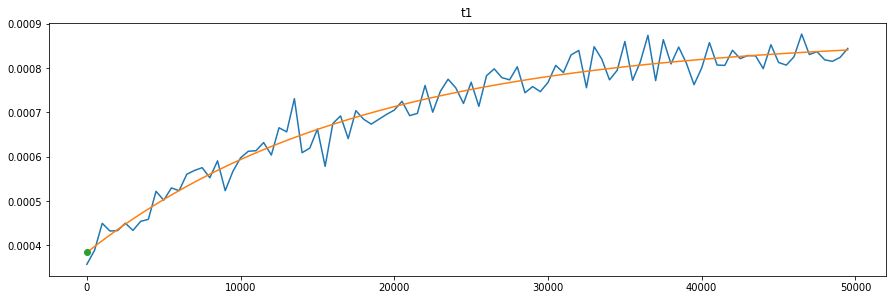

In [5]:
t1, dataset = ds.run_t1(qubit)

In [6]:
print(f"T1: {t1}")

T1: 17744


In [ ]:
ds.save_config_parameter("T1", float(t1), 'characterization', 'single_qubit', qubit)

Ramsey

In [ ]:
delta_frequency, corrected_qubit_frequency, t2, smooth_dataset, dataset = ds.run_ramsey(qubit)

In [4]:
print(f"Delta Frequency: {delta_frequency}")
print(f"Corrected qubit frequency: {corrected_qubit_frequency}")
print(f"T2: {t2}")

Delta Frequency: 1031642.8081764801
Corrected qubit frequency: 5082302888
T2: 11816.385225261094


In [ ]:
#adjusted_qubit_freq = int(platform.settings['characterization']['single_qubit'][qubit]['qubit_freq'] + delta_frequency)
ds.save_config_parameter("qubit_freq", corrected_qubit_frequency, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("T2", float(t2), 'characterization', 'single_qubit', qubit)
RX_pulse_sequence = platform.settings['native_gates']['single_qubit'][qubit]['RX']['pulse_sequence']
lo_qcm_frequency = int(corrected_qubit_frequency + RX_pulse_sequence[0]['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
print(corrected_qubit_frequency)

Ramsey Frequency Detuned

In [ ]:
t2, delta_phys, corrected_qubit_freq, dataset = ds.run_ramsey_frequency_detuned(qubit)

In [ ]:
print(f"Delta Frequency: {delta_phys}")
print(f"Corrected qubit frequency: {corrected_qubit_freq}")
lo_qcm_frequency = corrected_qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency']
print(f"Corrected out0_lo_freq: {lo_qcm_frequency}")
print(f"T2: {t2}")

In [ ]:
ds.save_config_parameter("qubit_freq", corrected_qubit_freq, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("T2", float(t2), 'characterization', 'single_qubit', qubit)
lo_qcm_frequency = int(corrected_qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
print(corrected_qubit_freq)

allXY

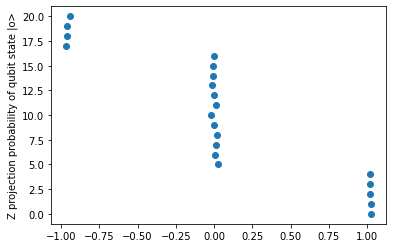

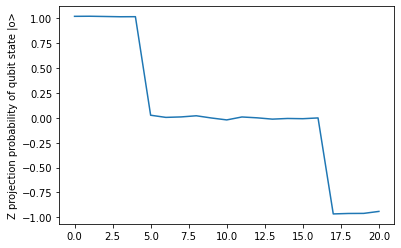

In [6]:
results, gateNumber = ds.run_allXY(qubit)

import matplotlib.pyplot as plt

plt.scatter(results, gateNumber)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

plt.plot(results)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

#TODO: for consistency move all plotting inside the function

            ["I","I"], 

            ["RX(pi)","RX(pi)"],
            ["RY(pi)","RY(pi)"],    
            ["RX(pi)","RY(pi)"],        
            ["RY(pi)","RX(pi)"],

            ["RX(pi/2)","I"],        
            ["RY(pi/2)","I"],            
            
            ["RX(pi/2)","RY(pi/2)"],            
            ["RX(pi/2)","RY(pi/2)"],                
            
            ["RX(pi/2)","RY(pi)"],                
            ["RY(pi/2)","RX(pi)"],                

            ["RX(pi)","RY(pi/2)"],                
            ["RX(pi)","RX(pi/2)"],                
            
            ["RX(pi/2)","RX(pi)"],                            
            ["RX(pi)","RX(pi/2)"],                
            ["RY(pi/2)","RY(pi)"],                
            ["RY(pi)","RY(pi/2)"],                
            
            ["RX(pi)","I"],  
            ["RY(pi)","I"],           
                 
            ["RX(pi/2)","RX(pi/2)"],                
            ["RY(pi/2)","RY(pi/2)"]    

Drag Pulse Beta Parameter Tunning

[-2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]


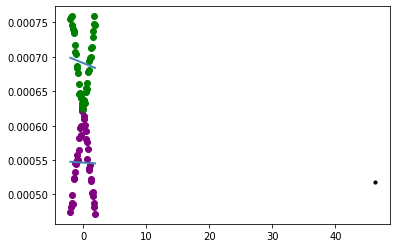

In [2]:
beta_optimal = ds.run_drag_pulse_tunning(qubit)

In [ ]:
print(f"Beta optimal: {beta_optimal}")
print(f"Drag Shape: Drag(5, {beta_optimal})")

Beta optimal: -0.00935208076009291
Drag Shape: Drag(5, -0.00935208076009291)


Flipping

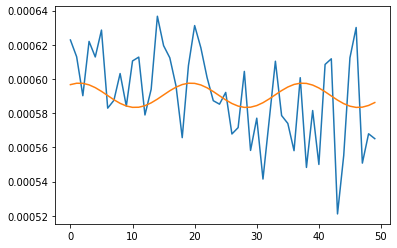

-0.05409059551209997


In [6]:
amplitude_delta = ds.run_flipping(qubit)
print(amplitude_delta)

Readout Pulse Phase 

In [3]:
0.984 -0.05641508634167667

0.9275849136583233

In [ ]:
#RX(pi) - readout with varying phase from 0 to 2pi
dataset = ds.run_rabi_pulse_phase()

Dispersive Shift Resonator Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     74s | time left:      0s  
100% completed | elapsed time:     74s | time left:      0s  

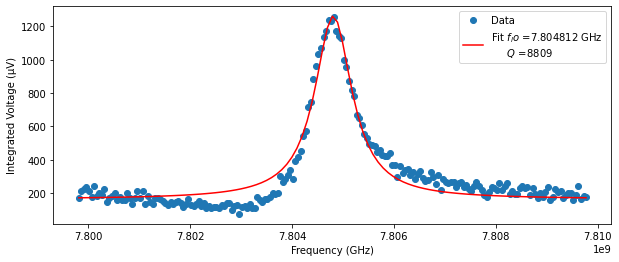

Starting iterative measurement...
100% completed | elapsed time:     76s | time left:      0s  
100% completed | elapsed time:     76s | time left:      0s  

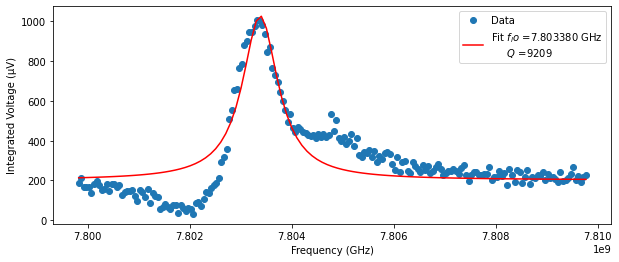


Resonator Frequency = 7824811566

Shifted Frequency = 7823379747

Dispersive Shift = -1431819


In [3]:
shifted_resonator_freq, dispersive_shift, peak_voltage, dataset = ds.run_dispersive_shift(qubit)

Spin Echo

In [ ]:
# Spin Echo: RX(pi/2) - wait t(rotates z) - RX(pi) - wait t(rotates z) - readout
dataset = ds.run_spin_echo(qubit)

In [ ]:
# Spin Echo 3 Pulses: RX(pi/2) - wait t(rotates z) - RX(pi) - wait t(rotates z) - RX(pi/2) - readout
dataset = ds.run_spin_echo_3pulses(qubit)

Qubit states classification

In [2]:
all_gnd_states, mean_gnd_states, all_exc_states, mean_exc_states = ds.calibrate_qubit_states(qubit)

Starting exc state calibration 0
Finished exc single shot execution  0
Starting exc state calibration 1
Finished exc single shot execution  1
Starting exc state calibration 2
Finished exc single shot execution  2
Starting exc state calibration 3
Finished exc single shot execution  3
Starting exc state calibration 4
Finished exc single shot execution  4
Starting exc state calibration 5
Finished exc single shot execution  5
Starting exc state calibration 6
Finished exc single shot execution  6
Starting exc state calibration 7
Finished exc single shot execution  7
Starting exc state calibration 8
Finished exc single shot execution  8
Starting exc state calibration 9
Finished exc single shot execution  9
Starting exc state calibration 10
Finished exc single shot execution  10
Starting exc state calibration 11
Finished exc single shot execution  11
Starting exc state calibration 12
Finished exc single shot execution  12
Starting exc state calibration 13
Finished exc single shot execution  1

In [3]:
mean_gnd_states, mean_exc_states
# TODO: Better print the results

((-5.543255134868772e-05+0.0008975930158821524j),
 (0.0001446400604158933+0.0003369969077198778j))

[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 

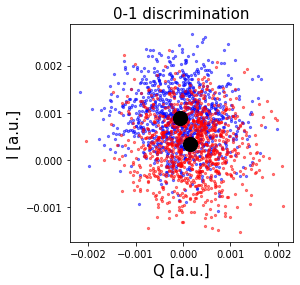

In [4]:
utils.plot_qubit_states(all_gnd_states, all_exc_states)

#Classify all points into 0 and 1
classified_gnd_results = []
for point in all_gnd_states: 
    classified_gnd_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

classified_exc_results = []
for point in all_exc_states:
    classified_exc_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

print(classified_gnd_results)
print(classified_exc_results)
# TODO: For consistency move plotting inside the function